In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
%matplotlib inline

from datetime import datetime

rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [3]:
df_ppl = pd.read_csv("data/new_people.csv", encoding = 'cp949')
df_sug = pd.read_csv("data/suggest.csv")
df_prc = pd.read_csv("data/process.csv")

/Users/wongijung/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_ppl.shape

(5605, 16)

In [5]:
df_sug.shape

(62658, 12)

In [6]:
df_prc.shape

(68530, 28)

In [7]:
df_bills = df_prc.apply(lambda x: (x['PROC_RESULT'].str.contains('가결'))

SyntaxError: unexpected EOF while parsing (<ipython-input-7-6c7aa60f471f>, line 1)

In [ ]:
df_prc.head(2)

In [8]:
df_sug.head(5)

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,10/5/20,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,10/5/20,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두"
2,PRC_C2Q0L1M0V0B5G1O8H1N6Z5V0W5W7A7,2104400,농업기계화 촉진법 일부개정법률안,NaN,10/5/20,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표"
3,PRC_F2A0Q1V0F0S5O1N8W1P6L2Z9T9D6K3,2104399,지방교부세법 일부개정법률안,NaN,10/5/20,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,신정훈,오영환,윤재갑,윤준병,이개호,이성만,전혜숙,최형두"
4,PRC_C2N0L1B0M0O5S1P8T0O6I1O8S4J8O7,2104398,농수산물의 원산지 표시에 관한 법률 일부개정법률안,NaN,10/5/20,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표"


In [9]:
df00 = df_sug.groupby(['AGE']).size().reset_index()
df00.head(5)

,AGE,0
0,1,74
1,2,124
2,3,113
3,4,93
4,5,115


In [10]:
df01 = df_sug.groupby(['AGE']).apply(lambda x: (x['PROC_RESULT'].str.contains('가결').sum())).reset_index(name='count')
df01.head(5)

,AGE,count
0,1,26
1,2,29
2,3,30
3,4,7
4,5,10


In [11]:
df02 = df00.merge(df01, 
                  left_on = 'AGE', 
                  right_on = 'AGE').rename(
                                           {0: 'BILLS',
                                           'count': 'PASSED'},
                                           axis = 1)
# df02['PASS_PCT'] = df02['PASSED'] / df02['BILLS']

In [12]:
df03 = df_sug.groupby(['AGE']).apply(lambda x: (x['PROC_RESULT'].str.contains('반영폐기').sum())).reset_index(name='ALT')
df03.head(3)

,AGE,ALT
0,1,9
1,2,23
2,3,10


In [13]:
df05 = df_sug.groupby(['AGE']).apply(lambda x: (x['BILL_NAME'].str.contains('대안').sum())).reset_index(name = 'ALT_BILL')
df05

,AGE,ALT_BILL
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0
5,6,1
6,7,0
7,8,0
8,9,0
9,10,0


In [14]:
df04 = df02.merge(df03, left_on = 'AGE', right_on = 'AGE')
df04['PASS_PCT'] = df04['PASSED'] / (df04['BILLS'] - df04['ALT'])

df04

,AGE,BILLS,PASSED,ALT,PASS_PCT
0,1,74,26,9,0.400000
1,2,124,29,23,0.287129
2,3,113,30,10,0.291262
3,4,93,7,8,0.082353
4,5,115,10,8,0.093458
5,6,313,76,57,0.296875
6,7,179,59,28,0.390728
7,8,41,4,1,0.100000
8,9,113,43,18,0.452632
9,10,5,3,0,0.600000


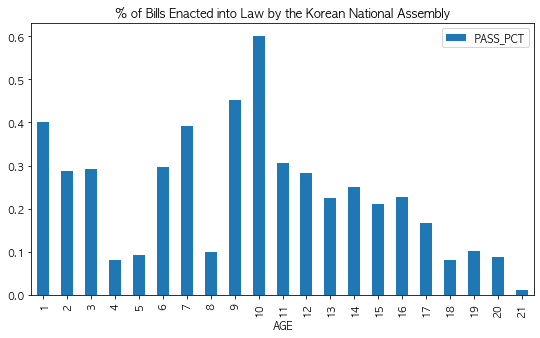

In [15]:
df04.plot('AGE', [4], kind = 'bar', figsize = (9,5),
        title = "% of Bills Enacted into Law by the Korean National Assembly")

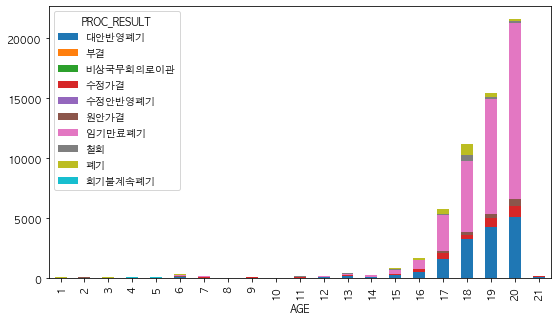

In [16]:
df_sug.groupby(['AGE', 'PROC_RESULT']).size().unstack().plot(figsize = (9,5), kind = 'bar', stacked = True)

In [17]:
# process.csv

df_prc.head(3)

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,COMMITTEE_NM,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,COMMITTEE_SUBMIT_DT,CURR_TRANS_DT,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,과학기술정보방송통신위원회,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,9/24/20,9/24/20,9/24/20,NaN,NaN
1,21,NaN,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,박광온의원,의원,9/24/20,9/24/20,9/24/20,NaN,NaN
2,21,NaN,NaN,NaN,NaN,PRC_B2C0D0H9S2D4W1P3U3V0E2P2Y0B0R9,기타,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,한정애의원,의원,9/24/20,9/24/20,9/24/20,NaN,NaN


In [18]:
# process.csv 에서 법률안만을 추려내 df_bills를 만든다.

df_bills = df_prc[df_prc["BILL_KIND"] == "법률안"]

In [19]:
# 기존 68,530 행에서 58,532행으로 약 10,000행 정도가 필터링되었다.

df_bills.shape

(58532, 28)

In [20]:
# 이 중에서 대안을 골라낸다. 대안반영폐기 법률안을 고려했을 때 법률안의 총 개수를 뻥튀기할 수 있는 가능성이 있기 때문이다.

df_alt_bills = df_bills[df_bills["BILL_NAME"].str.contains('\(대안\)')]

# 그 중에서 4,963개의 법안이 대안인 것으로 확인되었다. 대안은 위원회 상정 과정에서 수정되어 의결된다. 이 때 기존 법률안은 '대안 폐기'된다.

df_alt_bills.shape

(4963, 28)

In [21]:
# 그렇다면 전체 법률안들 중에서 최종 공포되는 법안의 개수는 몇 개일까. ANNOUNCE_DT 값의 유무로 알아낼 수 있다.

# 먼저 ANNOUNCE_DT 가 NaN인 행들을 걸러낸다.

df_bills_announced = df_bills.dropna(subset = ['ANNOUNCE_DT'])

# 58,532개의 법안 중에서 15,640개의 법안이 최종 공포되었다는 것을 확인할 수 있다.

df_bills_announced.shape

(15640, 28)

In [22]:
# 대안이 아닌 법안들 중에서 제안일과 공포일 사이에 걸린 시간은 어느 정도일까. DateTime 패키지를 사용해서 소요된 기간을 계산해봤다.

df_bills_announced_NA = df_bills_announced[~df_bills["BILL_NAME"].str.contains('\(대안\)')]

# 공포된 법안 중에서 대안이 아닌 법률안은 10,812개가 있다. 

df_bills_announced_NA.shape

/Users/wongijung/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(10812, 28)

In [23]:
# 계산을 위해 먼저 각 두 열의 값을 datetime 오브젝트로 바꿔준다.

df_bills_proposed = pd.to_datetime(df_bills_announced_NA['PROPOSE_DT']).reset_index(name = 'PROPOSED')
df_bills_announced = pd.to_datetime(df_bills_announced_NA['ANNOUNCE_DT']).reset_index(name = 'ANNOUNCED')

# 다음, 계산의 편의를 위해 두 데이터프레임을 하나로 합쳐준다.

df_bills_dates = df_bills_proposed.merge(df_bills_announced, left_on = 'index', right_on = 'index')

# 계산식은 ANNOUNCE_DT (공포일) - PROPOSE_DT (제안일) 이다. 이 값을 "TIME_TAKEN" 열로 추가한다.

df_bills_dates["TIME_TAKEN"] = df_bills_dates["ANNOUNCED"] - df_bills_dates["PROPOSED"]

In [24]:
# 현재 datetime 오브젝트로 계산되어 있는 "TIME_TAKEN" 열을 int 값으로 바꿔준다.

df_bills_dates['TIME_TAKEN_INT'] = pd.to_numeric(df_bills_dates['TIME_TAKEN'].dt.days, downcast = 'integer')

In [25]:
df_bills_dates.head(3)

,index,PROPOSED,ANNOUNCED,TIME_TAKEN,TIME_TAKEN_INT
0,64,2020-08-03,2020-08-12,9 days,9
1,84,2020-07-14,2020-08-12,29 days,29
2,88,2020-07-13,2020-08-18,36 days,36


In [31]:
# 데이터 상 오류를 점검한다. "TIME_TAKEN_INT"를 기준으로 음수값을 가지거나, 4년 이상 (약 1360일) 걸린 법률안은 오류로 처리한다.

df_bills_dates = df_bills_dates.drop(df_bills_dates[df_bills_dates.TIME_TAKEN_INT < 0].index)
df_bills_dates = df_bills_dates.drop(df_bills_dates[df_bills_dates.TIME_TAKEN_INT > 1360].index)

In [32]:
# 마지막으로, 원 데이터프레임과 TIME_TAKEN 열을 합쳐준다.

df_bills_announced_NA_with_date = df_bills_announced_NA.reset_index().merge(df_bills_dates[['index', 'TIME_TAKEN_INT']], 
                                                                            left_on = 'index',
                                                                            right_on = 'index')

df_bills_announced_NA_with_date.head(1)

,index,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,COMMITTEE_NM,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,COMMITTEE_SUBMIT_DT,CURR_TRANS_DT,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT,TIME_TAKEN_INT
0,64,21,8/12/20,NaN,NaN,NaN,PRC_Y2H0K0W7E3C0S1N1C0C8O2Q3T7I7S5,법률안,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2102648,2.0,보건복지위원회,7/30/20,7/30/20,NaN,8/7/20,8/3/20,8/3/20,7/30/20,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,보건복지위원장,NaN,8/3/20,8/4/20,8/4/20,278.0,276.0,9


In [33]:
# 그렇다면 각 법률안이 공포되기까기 걸린 평균 일수에 각 국회별 차이가 있을까. 확인을 위해 groupby 함수와 lambda 함수를 활용한다.

df_bills_announced_NA_with_date_by_age = df_bills_announced_NA_with_date.groupby('AGE')['TIME_TAKEN_INT'].mean().reset_index(name = 'DAYS_PASSED')

In [41]:
df_bills_announced_NA_with_date_by_age = df_bills_announced_NA_with_date_by_age.rename({'AGE': 'SESSION'}, axis = 1)

df_bills_announced_NA_with_date_by_age

,SESSION,DAYS_PASSED
0,1,129.433071
1,2,104.798817
2,3,162.093525
3,4,78.916667
4,5,56.491525
5,6,159.754032
6,7,103.972441
7,8,137.027027
8,9,79.300195
9,10,72.375000


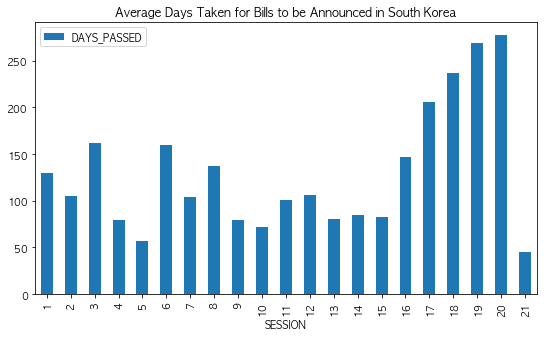

In [42]:
df_bills_announced_NA_with_date_by_age.plot('SESSION', [1], kind = 'bar', figsize = (9,5),
                                            title = "Average Days Taken for Bills to be Announced in South Korea")

In [52]:
df_prc_count = df_prc.groupby('AGE').count()
df_prc_count

,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,COMMITTEE_NM,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,COMMITTEE_SUBMIT_DT,CURR_TRANS_DT,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,135,0,0,0,238,238,238,238,0,192,11,182,0,51,0,0,0,238,0,238,238,2,238,7,238,0,0
2,186,0,19,0,964,964,964,964,0,638,6,353,92,506,0,0,0,964,0,956,940,525,964,1,964,0,0
3,154,0,4,13,1058,1058,1058,1058,0,655,9,301,512,389,0,0,0,1058,0,1058,1039,630,1058,18,1058,0,0
4,72,0,1,0,582,582,582,582,0,424,4,112,26,132,0,0,0,582,0,582,575,251,582,0,582,0,0
5,64,0,0,2,508,508,508,508,0,363,4,124,54,90,37,37,0,508,0,507,505,210,508,36,508,0,0
6,327,12,12,2,1198,1198,1198,1198,0,1097,439,842,815,525,231,231,0,1198,0,1198,1186,529,1198,677,1198,0,0
7,352,0,14,12,876,876,876,876,0,787,347,641,625,531,279,279,0,876,0,876,861,327,876,662,876,0,0
8,38,3,3,1,247,247,247,247,0,220,74,82,189,81,31,31,0,247,0,247,241,102,247,112,247,0,0
9,534,15,17,18,951,951,951,951,0,895,663,715,741,690,476,476,123,951,0,951,933,300,951,724,951,0,0


In [53]:
df_law_mask = df_prc["BILL_KIND"] == "법률안"
df_law = df_prc[df_law_mask]
df_law_count = df_law.groupby('AGE').count()

In [54]:
df_law_count_2 = df_law.groupby(['AGE', 'PROC_RESULT_CD']).size()
df_law_count_2.reset_index()

,AGE,PROC_RESULT_CD,0
0,1,대안반영폐기,18
1,1,수정가결,97
2,1,원안가결,50
3,1,임기만료폐기,6
4,1,철회,1
5,1,폐기,23
6,1,회기불계속폐기,41
7,2,대안반영폐기,39
8,2,반려,4
9,2,부결,1


In [55]:
df_prc['BILL_KIND'].unique()

array(['기타', '법률안', '예산안', '결산'], dtype=object)

In [56]:
df_law_count

,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,COMMITTEE_NM,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,COMMITTEE_SUBMIT_DT,CURR_TRANS_DT,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,134,0,0,0,236,236,236,236,0,192,11,182,0,51,0,0,0,236,0,236,236,0,236,7,236,0,0
2,184,0,0,0,416,416,416,416,0,398,6,347,47,207,0,0,0,416,0,416,416,0,416,1,416,0,0
3,151,0,0,0,409,409,409,409,0,407,9,227,349,157,0,0,0,409,0,409,409,0,409,3,409,0,0
4,71,0,0,0,324,324,324,324,0,322,4,112,17,77,0,0,0,324,0,324,324,0,324,0,324,0,0
5,63,0,0,0,296,296,296,296,0,289,4,116,3,55,37,37,0,296,0,296,296,0,296,0,296,0,0
6,326,0,0,0,657,657,657,657,0,657,296,510,551,369,231,231,0,657,0,657,657,0,657,333,657,0,0
7,351,0,0,0,534,534,534,534,0,534,290,447,480,379,279,279,0,534,0,534,534,0,534,362,534,0,0
8,37,0,0,0,139,139,139,139,0,139,51,60,136,37,31,31,0,139,0,139,139,0,139,38,139,0,0
9,534,0,0,0,633,633,633,633,0,633,562,590,595,537,476,476,123,633,0,633,633,0,633,539,633,0,0


In [57]:
df_law_order = df_law_count[['BILL_ID', 'COMMITTEE_PRESENT_DT', 'COMMITTEE_PROC_DT', 'COMMITTEE_SUBMIT_DT',
                             'LAW_PRESENT_DT', 'LAW_PROC_DT', 'LAW_SUBMIT_DT',
                             'RGS_PRESENT_DT', 'RGS_PROC_DT', 'CURR_TRANS_DT', 'PROC_RESULT_CD', 'ANNOUNCE_DT']]
df_law_order

,BILL_ID,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,COMMITTEE_SUBMIT_DT,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,RGS_PRESENT_DT,RGS_PROC_DT,CURR_TRANS_DT,PROC_RESULT_CD,ANNOUNCE_DT
AGE,,,,,,,,,,,,
1,236,11,182,0,0,0,0,7,236,51,236,134
2,416,6,347,47,0,0,0,1,416,207,416,184
3,409,9,227,349,0,0,0,3,409,157,409,151
4,324,4,112,17,0,0,0,0,324,77,324,71
5,296,4,116,3,37,37,0,0,296,55,296,63
6,657,296,510,551,231,231,0,333,657,369,657,326
7,534,290,447,480,279,279,0,362,534,379,534,351
8,139,51,60,136,31,31,0,38,139,37,139,37
9,633,562,590,595,476,476,123,539,633,537,633,534


In [64]:
df_law_pct = df_law_order[['BILL_ID', 'COMMITTEE_SUBMIT_DT', 'COMMITTEE_PRESENT_DT', 'COMMITTEE_PROC_DT',
                        'LAW_SUBMIT_DT', 'LAW_PRESENT_DT', 'LAW_PROC_DT', 
                        'RGS_PRESENT_DT', 'RGS_PROC_DT', 'CURR_TRANS_DT', 'ANNOUNCE_DT', 'PROC_RESULT_CD']].div(df_law_order.BILL_ID, axis = 0)

# 제53조 ①국회에서 의결된 법률안은 정부에 이송되어 15일 이내에 대통령이 공포한다.

In [65]:
df_law_pct

,BILL_ID,COMMITTEE_SUBMIT_DT,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,LAW_SUBMIT_DT,LAW_PRESENT_DT,LAW_PROC_DT,RGS_PRESENT_DT,RGS_PROC_DT,CURR_TRANS_DT,ANNOUNCE_DT,PROC_RESULT_CD
AGE,,,,,,,,,,,,
1,1.0,0.000000,0.046610,0.771186,0.000000,0.000000,0.000000,0.029661,1.0,0.216102,0.567797,1.0
2,1.0,0.112981,0.014423,0.834135,0.000000,0.000000,0.000000,0.002404,1.0,0.497596,0.442308,1.0
3,1.0,0.853301,0.022005,0.555012,0.000000,0.000000,0.000000,0.007335,1.0,0.383863,0.369193,1.0
4,1.0,0.052469,0.012346,0.345679,0.000000,0.000000,0.000000,0.000000,1.0,0.237654,0.219136,1.0
5,1.0,0.010135,0.013514,0.391892,0.000000,0.125000,0.125000,0.000000,1.0,0.185811,0.212838,1.0
6,1.0,0.838661,0.450533,0.776256,0.000000,0.351598,0.351598,0.506849,1.0,0.561644,0.496195,1.0
7,1.0,0.898876,0.543071,0.837079,0.000000,0.522472,0.522472,0.677903,1.0,0.709738,0.657303,1.0
8,1.0,0.978417,0.366906,0.431655,0.000000,0.223022,0.223022,0.273381,1.0,0.266187,0.266187,1.0
9,1.0,0.939968,0.887836,0.932070,0.194313,0.751975,0.751975,0.851501,1.0,0.848341,0.843602,1.0


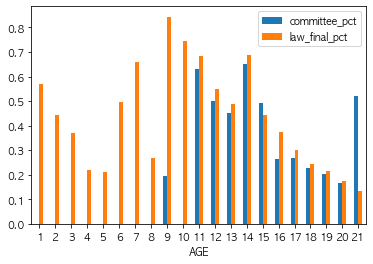

In [60]:
df = pd.DataFrame({'committee_pct': df_law_pct['LAW_SUBMIT_DT'],
                  'law_final_pct': df_law_pct['ANNOUNCE_DT']})
ax = df.plot.bar(rot=0)

In [61]:
df_law_pct.reset_index().head()

,AGE,BILL_ID,COMMITTEE_SUBMIT_DT,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,LAW_SUBMIT_DT,LAW_PRESENT_DT,LAW_PROC_DT,RGS_PRESENT_DT,RGS_PROC_DT,CURR_TRANS_DT,PROC_RESULT_CD,ANNOUNCE_DT
0,1,1.0,0.000000,0.046610,0.771186,0.0,0.000,0.000,0.029661,1.0,0.216102,1.0,0.567797
1,2,1.0,0.112981,0.014423,0.834135,0.0,0.000,0.000,0.002404,1.0,0.497596,1.0,0.442308
2,3,1.0,0.853301,0.022005,0.555012,0.0,0.000,0.000,0.007335,1.0,0.383863,1.0,0.369193
3,4,1.0,0.052469,0.012346,0.345679,0.0,0.000,0.000,0.000000,1.0,0.237654,1.0,0.219136
4,5,1.0,0.010135,0.013514,0.391892,0.0,0.125,0.125,0.000000,1.0,0.185811,1.0,0.212838


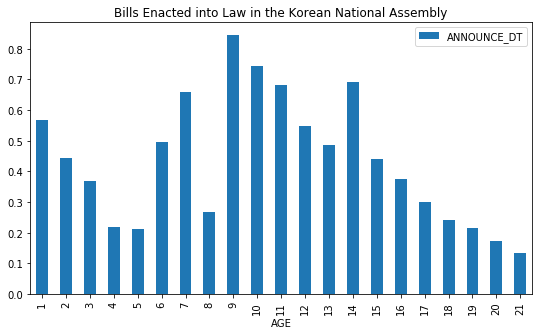

In [73]:
df1 = df1.rename({'AGE': 'SESSION'}, axis = 1)

df1 = df_law_pct.reset_index()[:21]
df1.plot('AGE', [12], kind = 'bar', figsize = (9,5),
        title = "Bills Enacted into Law in the Korean National Assembly")

In [211]:
df_law[df_law["AGE"] == 20]['COMMITTEE_NM'].unique()

array(['법제사법위원회', '행정안전위원회', '정보위원회', '여성가족위원회', '문화체육관광위원회', '국회운영위원회',
       '과학기술정보방송통신위원회', '기획재정위원회', '국토교통위원회', '환경노동위원회', '정무위원회', '국방위원회',
       '외교통일위원회', '농림축산식품해양수산위원회', '교육위원회', '보건복지위원회',
       '헌법개정 및 정치개혁 특별위원회', '산업통상자원중소벤처기업위원회', '정치개혁 특별위원회', '사법개혁 특별위원회',
       nan, '교육문화체육관광위원회', '안전행정위원회', '산업통상자원위원회', '미래창조과학방송통신위원회'],
      dtype=object)